In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Idea del analisis: cuantas menos palabras repetidas tiene un texto, mejor esta escrito (utilizacion de sinonimos), lo que puede significar q la persona q lo escribió tiene un minimo nivel académico y su tweet es mas probable q sea real

In [63]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 1ro distribucion de cantidad de palabras por tweet

In [64]:
df['words_count'] = df['text'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Density')

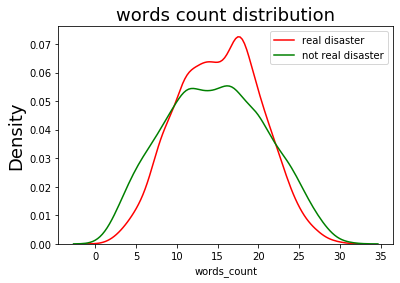

In [65]:
g = sns.distplot(df[df['target'] == 1]['words_count'], color = 'red', label = 'real disaster', hist=False)
g = sns.distplot(df[df['target'] == 0]['words_count'], color = 'green', label = 'not real disaster', hist=False)
g.set_title("words count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

### la distribucion de ambas es la normal, para los tweets sobre desastres reales la varianza es menor. A simple vista el valor medio para desastres reales parece ser apenas mayor y con un valor cercano a 17 (luego será analizado)

## 3do distribucion de cantidad de palabras unicas por tweet

In [66]:
df['unique_words_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df

,id,keyword,location,text,target,words_count,unique_words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,17
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,19


Text(0, 0.5, 'Density')

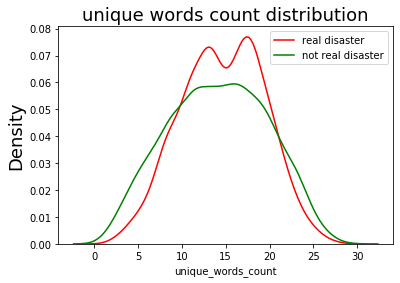

In [67]:
g = sns.distplot(df[df['target'] == 1]['unique_words_count'], color = 'red', label = 'real disaster', hist=False)
g = sns.distplot(df[df['target'] == 0]['unique_words_count'], color = 'green', label = 'not real disaster', hist=False)
g.set_title("unique words count distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

### se observan valores de densidad similares a los de words count, se podria decir q la mayoria de las palabras en los tweets son unicas, la comprobacion:

In [68]:
df['unique_words_percentage'] = (df['unique_words_count'] / df['words_count']) * 100

Text(0, 0.5, 'Density')

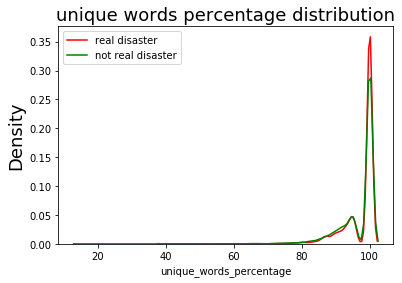

In [69]:
g = sns.distplot(df[df['target'] == 1]['unique_words_percentage'], color = 'red', label = 'real disaster', hist=False)
g = sns.distplot(df[df['target'] == 0]['unique_words_percentage'], color = 'green', label = 'not real disaster', hist=False)
g.set_title("unique words percentage distribution", fontsize=18)
g.set_ylabel("Density", fontsize=18)

### se cumple lo que se predijo

## 4to verificar idea del analisis

In [70]:
df_unique_mean = df.groupby(['target']).agg({'unique_words_count': 'mean', 'words_count': 'mean'})
df_unique_mean

,unique_words_count,words_count
target,,
0,14.096499,14.704744
1,14.664934,15.167533


In [71]:
df_unique_mean = df_unique_mean.rename(index={0: 'Not Real Disaster', 1: 'Real Disaster'}).reset_index()
df_unique_mean

,target,unique_words_count,words_count
0,Not Real Disaster,14.096499,14.704744
1,Real Disaster,14.664934,15.167533


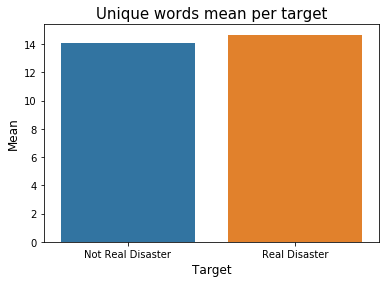

In [72]:
g = sns.barplot(x=df_unique_mean['target'].values, y=df_unique_mean['unique_words_count'].values, orient='v')
g.set_title("Unique words mean per target", fontsize=15)
g.set_xlabel("Target", fontsize=12)
g.set_ylabel("Mean", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)

### Se cumple (por poco) q en promedio los tweets sobre desastres reales tienen mayor cantidad de palabras únicas